# Анализ данных для проекта телеграмм бот подбора машин в автопарк

Автор проекта Храмцов Никита, студент 2 курса ИрНИТУ

Данный проект предпологает предложение различных вариантов автомобилей под различные задачи для владельцев автопарков, которые сдают свои машины в аренду либо сами осуществляют перевозки и хотят приобрести автомобиль

Функционал телеграмм бота будет предпологать, выбор категории перевозок(такси или грузоперевозки) и представление на выбор нескольких наиболее выгодных вариантов автомобилей

#### Import and settings

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

#### График динамики роста рынка за последние 5 лет


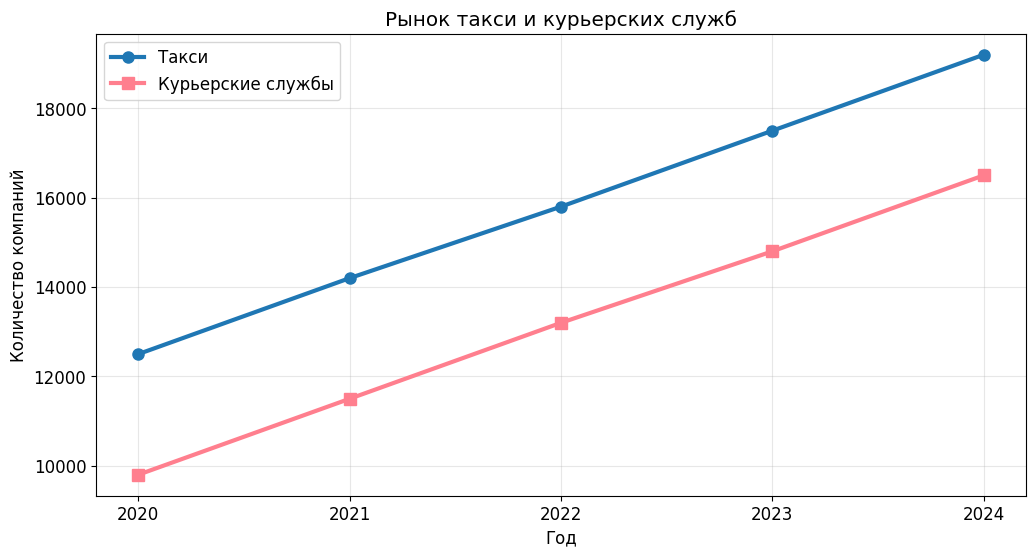


СТАТИСТИКА РОСТА РЫНКА
Общий рост рынка за 5 лет: +60.1%
Рост такси: +53.6%
Рост курьерских служб: +68.4%


In [22]:
with open('/content/drive/MyDrive/Python/project_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

market_growth = pd.DataFrame(data['market_analysis']['yearly_growth'])

years = market_growth['year']
taxi_companies = market_growth['taxi_companies']
courier_companies = market_growth['courier_companies']
total_companies = market_growth['total_companies']


plt.plot(years, taxi_companies, marker='o', linewidth=3, markersize=8, label='Такси', color='#1f77b4')
plt.plot(years, courier_companies, marker='s', linewidth=3, markersize=8, label='Курьерские службы', color='#ff7f8e')

plt.xticks(years, labels=[str(int(year)) for year in years])

plt.xlabel('Год')
plt.ylabel('Количество компаний')
plt.title('Рынок такси и курьерских служб')
plt.legend()
plt.show()

print("\nСТАТИСТИКА РОСТА РЫНКА")

total_growth_5years = ((total_companies.iloc[-1] - total_companies.iloc[0]) /
                      total_companies.iloc[0] * 100)
taxi_growth = ((taxi_companies.iloc[-1] - taxi_companies.iloc[0]) /
              taxi_companies.iloc[0] * 100)
courier_growth = ((courier_companies.iloc[-1] - courier_companies.iloc[0]) /
                 courier_companies.iloc[0] * 100)

print(f"Общий рост рынка за 5 лет: +{total_growth_5years:.1f}%")
print(f"Рост такси: +{taxi_growth:.1f}%")
print(f"Рост курьерских служб: +{courier_growth:.1f}%")



#### Региональное распределение компаний

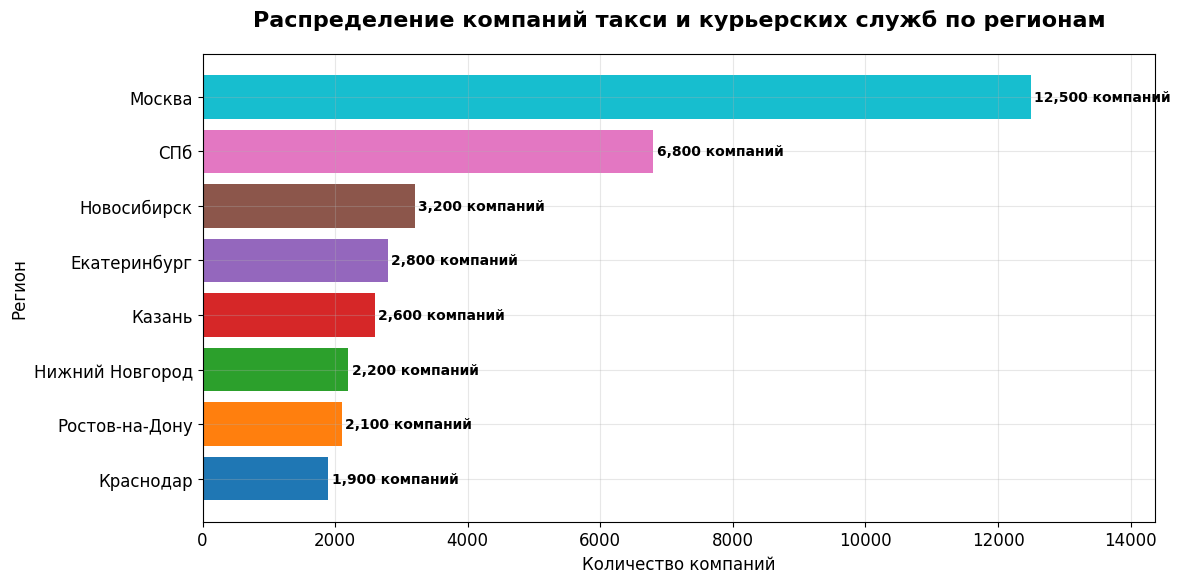

СТАТИСТИКА РЕГИОНАЛЬНОГО РАСПРЕДЕЛЕНИЯ
ТОП-3 региона по количеству компаний:
1. Москва: 12,500 компаний
2. СПб: 6,800 компаний
3. Новосибирск: 3,200 компаний
 Всего компаний по России: 34,100


In [33]:
regions = pd.DataFrame(data['market_analysis']['regional_distribution'])
regions_sorted = regions.sort_values('companies', ascending=True)

bars = plt.barh(regions_sorted['region'], regions_sorted['companies'],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                      '#8c564b', '#e377c2', '#17becf'])

plt.title('Распределение компаний такси и курьерских служб по регионам',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Количество компаний', fontsize=12)
plt.ylabel('Регион', fontsize=12)

total_companies = regions_sorted['companies'].sum()
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2.,
             f'{width:,} компаний',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.xlim(0, regions_sorted['companies'].max() * 1.15)

plt.tight_layout()
plt.show()

print("СТАТИСТИКА РЕГИОНАЛЬНОГО РАСПРЕДЕЛЕНИЯ")

top_3_regions = regions_sorted.nlargest(3, 'companies')
print("ТОП-3 региона по количеству компаний:")
for i, (idx, row) in enumerate(top_3_regions.iterrows(), 1):
    print(f"{i}. {row['region']}: {row['companies']:,} компаний")

print(f" Всего компаний по России: {total_companies:,}")

#### Структура автопарков по размеру


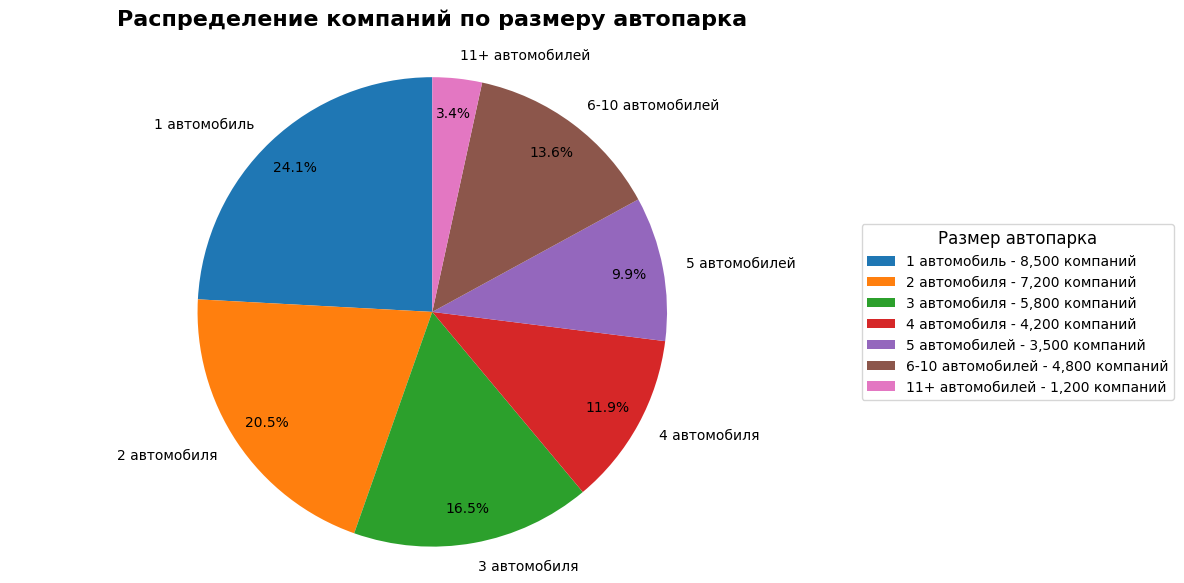

In [36]:
fleet_sizes = pd.DataFrame(data['market_analysis']['fleet_size_distribution'])

sizes = fleet_sizes['fleet_size']
companies = fleet_sizes['companies']
percentages = fleet_sizes['percentage']

# Создаем круговую диаграмму
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
wedges, texts, autotexts = plt.pie(companies, labels=sizes,autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 10}, pctdistance=0.85)

legend_labels = [f'{size} - {company:,} компаний'
                for size, company, pct in zip(sizes, companies, percentages)]
plt.legend(wedges, legend_labels,
          title="Размер автопарка",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=10)

plt.title('Распределение компаний по размеру автопарка',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Чтобы круг был круглым

plt.tight_layout()
plt.show()

Мы видим, что большоя доля компаний имеет мало автомобилей и в дальнейшем скорее всего будет расширяться. Эти компании являются нашей целевой аудиторией

#### Переплаты при выборе неправильного автомобиля

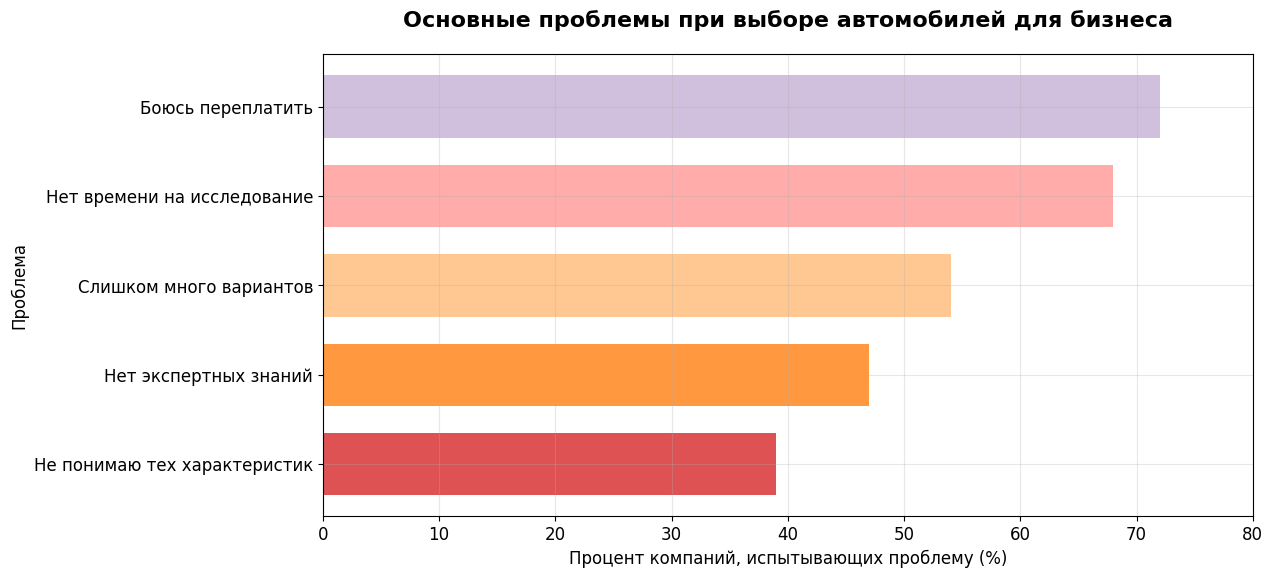

In [41]:
pain_points = pd.DataFrame(data['user_behavior_analysis']['decision_pain_points'])

pain_points_sorted = pain_points.sort_values('frequency', ascending=True)

colors = ['#d62728', '#ff7f0e', '#ffbb78', '#ff9896', '#c5b0d5']
bars = plt.barh(pain_points_sorted['pain_point'], pain_points_sorted['frequency'],
                color=colors, alpha=0.8, height=0.7)

plt.title('Основные проблемы при выборе автомобилей для бизнеса',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Процент компаний, испытывающих проблему (%)', fontsize=12)
plt.ylabel('Проблема', fontsize=12)
plt.xlim(0, 80)
plt.show()

#### Выводы

Рынок демонстрирует устойчивый рост - количество компаний в сфере такси и курьерских служб значительно увеличилось за последние годы. Это создает постоянно растущую целевую аудиторию для данного сервиса.

Высокая концентрация в крупных городах - основная масса компаний сосредоточена в Москве, Санкт-Петербурге и других крупных городах, что упрощает маркетинг и продвижение бота.

Большой процент малого бизнеса - большинство компаний имеют небольшой автопарк (1-5 автомобилей). Именно такие предприятия чаще всего испытывают потребность в простых и доступных решениях.

Основная проблема бизнеса - страх переплатить при выборе автомобилей. Данный бот решает эту проблему, помогая компаниям избежать финансовых потерь.

Экономия времени - бизнесу не хватает времени на глубокое исследование рынка автомобилей. Бот предоставляет готовые решения практически моментально

Простота использования - в отличие от сложных аналитических систем, Telegram-бот интуитивно понятен и не требует обучения.